<a href="https://colab.research.google.com/github/UsernameisKoo/GDG_ML_Session_week3/blob/main/%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C/linear_regression_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **문제 1. 가중치 벡터 w에 대한 경사하강법 업데이트 식을 적으시오.**

( 이미지를 삽입해도 좋고 직접 타이핑해도 좋음. 방법은 상관 X )





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

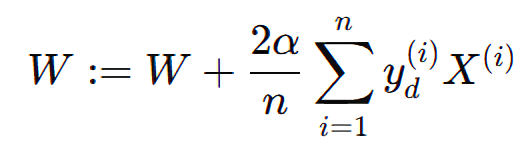






# **문제 2. 선형회귀 모델 만들기**

---

### **데이터셋 : The Boston Housing Dataset**
### **url :** https://lib.stat.cmu.edu/datasets/boston



## **모델**
#### **입력변수 :** RM (평균 객실 수)
#### **출력변수 :** PRICE (부동산 가격)

##  2 - 1) 필요 라이브러리 선언

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##   2 - 2) 학습용 데이터 준비

In [ ]:
# csv 파일
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/Github/ML_Session_week3/housing.csv')
# 6번째 RM
x = data[:, 5]
x = x.reshape(-1, 1)
# 더미 변수 1 추가
x = np.insert(x, 0, 1.0, axis=1)
# 14번째 PRICE
yt = data[:,13]

## 2 - 3) 입력값 정답값 확인

### 2.3.0 ) [ x0, x1 ]값 5개 출력

In [ ]:
# [ x0, x1 ]값 5개 출력
print(x[:5,:])

### 2.3.1 ) 정답값 yt 5개 표시

In [ ]:
# 정답값 yt 5개 표시
print(yt[:5])

## 2 - 4 ) 방 개수와 집 가격의 관계를 산점도로 보기
(x축 이름 ROOM, y축 이름 PRICE)

In [ ]:
plt.scatter(x[ : ,1 ], yt, s = 10, c = 'b')
plt.xlabel('ROOM', fontsize = 14)
plt.ylabel('PRICE', fontsize = 14)
plt.show()

## 2 - 5 ) 경사하강법에서의 초기화 처리
( 반복 횟수는 50000번, 학습률은 0.01로 설정 )

In [ ]:
# 데이터 전체 건수
M = x.shape[0]

# 입력 데이터의 차수(더미)
D = x.shape[1]

# 반복 횟수
iters = 50000

# 학습률
alpha = 0.01

# 가중치 벡터의 초깃값(모든 값을 1로 한다)
w = np.ones(D)

# 평가 결과 기록(손실함수의 값만 기록)
history = np.zeros((0,2))

## 2 - 6 ) 예측함수 (1, x)의 값에서 예측값 yp를 계산

In [ ]:
def pred(x, w):
    return(x @ w)

## 2 - 7 ) 반복 루프
( 반복횟수가 1000의 배수일 때마다 계산 결과 기록하고 화면에 출력하시오. )

In [ ]:
for k in range(iters):

    # 예측값 계산
    yp = pred(x, w)

    # 오차 계산
    yd = yp - yt

    # 경사하강법 적용
    w = w - alpha * (x.T @ yd) / M

    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 1000 == 0):
        # 손실함숫값의 계산
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

## 2 - 8 ) 최종 손실함수 초깃값과 최종값 출력



In [ ]:
print('손실함수 초깃값: %f' %history[0,1])
print('손실함수 최종값: %f' %history[-1,1])

## 2 - 9 ) 학습 곡선을 표시
( x축 이름 iter, y축 이름 loss로 설정 )

In [ ]:
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(history[1:,0],history[1:,1])
plt.show()